In [1]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
#Set Data folder
date = "2024_12_02"

#folder = "C:/Users/skiang/OneDrive - Rice University/Research/LVAD Sensing/WindowsLaptop/Processing/Data_"+date+"/" #Windows Path
folder =  "/Users/sk/Library/CloudStorage/OneDrive-RiceUniversity/Research/LVAD Sensing/WindowsLaptop/Processing/Data_"+date+"/" 
#Read in Data

def read_csv (Condition,HR,DATE,PATH):
    dfData=pd.read_csv(PATH + DATE + '_' + Condition + '_' + HR +'.csv')
    dfData.drop('Unnamed: 0',axis = 1,inplace=True)
    dfData.RPM = -dfData.RPM
    dfData.Current = -dfData.Current
    return dfData

#Define Classes

class Healthy:
    def __init__(self):
        self.BPM60 = []
        self.BPM80 = []
class MHF:
    def __init__(self):
        self.BPM60 = []
        self.BPM80 = []
class SHF:
    def __init__(self):
        self.BPM60 = []
        self.BPM80 = []




Healthy.BPM60 = read_csv('Healthy','60BPM',date,folder)
Healthy.BPM80 = read_csv('Healthy','80BPM',date,folder)

MHF.BPM60 = read_csv('MHF','60BPM',date,folder)
MHF.BPM80 = read_csv('MHF','80BPM',date,folder)

SHF.BPM60 = read_csv('SHF','60BPM',date,folder)
SHF.BPM80 = read_csv('SHF','80BPM',date,folder)



#Standardize the size of the arrays (They are all about 5 minutes of data at 30 Samples/second = ~9000 datapoints)
min_len = min(len(Healthy.BPM60),len(Healthy.BPM80),len(MHF.BPM60),len(MHF.BPM80),len(SHF.BPM60),len(SHF.BPM80))

Healthy.BPM60 = Healthy.BPM60[:min_len]
Healthy.BPM80 = Healthy.BPM80[:min_len]

MHF.BPM60 = MHF.BPM60[:min_len]
MHF.BPM80 = MHF.BPM80[:min_len]

SHF.BPM60 = SHF.BPM60[:min_len]
SHF.BPM80 = SHF.BPM80[:min_len]



In [2]:
from scipy.signal import butter, filtfilt


def LPF(rawData): 
    cutoff_freq = np.array([0.2, 2])  # Cutoff frequency in Hz
    fs = len(rawData.Time)/max(rawData.Time)  # Sampling rate in Hz
    order = 4  # Filter order
    
    # Design the low-pass filter
    nyq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype='band',analog = False)

    # Apply the filter
    filteredDataCurrent = filtfilt(b, a, rawData.Current)
    filteredDataRPM = filtfilt(b, a, rawData.RPM)
    return [filteredDataCurrent, filteredDataRPM] 



'''

[CURRENT, RPM] = LPF(Healthy.BPM60)

t = Healthy.BPM60.Time


# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, Healthy.BPM60.Current, label='Original Signal')
plt.plot(t, CURRENT, label='Filtered Signal')
plt.xlim([60,65])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current')
plt.legend()
plt.grid(True)

plt.show()

plt.plot(t, Healthy.BPM60.RPM, label='Original Signal')
plt.plot(t, RPM, label='Filtered Signal')
plt.xlim([60,65])
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current')
plt.legend()
plt.grid(True)

plt.show()
'''

"\n\n[CURRENT, RPM] = LPF(Healthy.BPM60)\n\nt = Healthy.BPM60.Time\n\n\n# Plot the original and filtered data\nplt.figure(figsize=(10, 6))\n\nplt.plot(t, Healthy.BPM60.Current, label='Original Signal')\nplt.plot(t, CURRENT, label='Filtered Signal')\nplt.xlim([60,65])\nplt.xlabel('Time (s)')\nplt.ylabel('Current (A)')\nplt.title('Current')\nplt.legend()\nplt.grid(True)\n\nplt.show()\n\nplt.plot(t, Healthy.BPM60.RPM, label='Original Signal')\nplt.plot(t, RPM, label='Filtered Signal')\nplt.xlim([60,65])\nplt.xlabel('Time (s)')\nplt.ylabel('Current')\nplt.title('Current')\nplt.legend()\nplt.grid(True)\n\nplt.show()\n"

In [3]:
[Healthy.BPM60.Current.Filtered, Healthy.BPM60.RPM.Filtered] = LPF(Healthy.BPM60)
[Healthy.BPM80.Current.Filtered, Healthy.BPM80.RPM.Filtered] = LPF(Healthy.BPM80)

[MHF.BPM60.Current.Filtered, MHF.BPM60.RPM.Filtered] = LPF(MHF.BPM60)
[MHF.BPM80.Current.Filtered, MHF.BPM80.RPM.Filtered] = LPF(MHF.BPM80)

[SHF.BPM60.Current.Filtered, SHF.BPM60.RPM.Filtered] = LPF(SHF.BPM60)
[SHF.BPM80.Current.Filtered, SHF.BPM80.RPM.Filtered] = LPF(SHF.BPM80)


In [4]:
#Taking the derivative of the filtered values

#RPM
SHFGradientRPM60 = np.gradient(SHF.BPM60.RPM.Filtered, SHF.BPM60.Time)
MHFGradientRPM60 = np.gradient(MHF.BPM60.RPM.Filtered, MHF.BPM60.Time)
HealthyGradientRPM60 = np.gradient(Healthy.BPM60.RPM.Filtered, Healthy.BPM60.Time)


SHFGradientRPM80 = np.gradient(SHF.BPM80.RPM.Filtered, SHF.BPM80.Time)
MHFGradientRPM80 = np.gradient(MHF.BPM80.RPM.Filtered, MHF.BPM80.Time)
HealthyGradientRPM80 = np.gradient(Healthy.BPM80.RPM.Filtered, Healthy.BPM80.Time)

#Current
SHFGradientCurrent60 = np.gradient(SHF.BPM60.Current.Filtered, SHF.BPM60.Time)
MHFGradientCurrent60 = np.gradient(MHF.BPM60.Current.Filtered, MHF.BPM60.Time)
HealthyGradientCurrent60 = np.gradient(Healthy.BPM60.Current.Filtered, Healthy.BPM60.Time)


SHFGradientCurrent80 = np.gradient(SHF.BPM80.Current.Filtered, SHF.BPM80.Time)
MHFGradientCurrent80 = np.gradient(MHF.BPM80.Current.Filtered, MHF.BPM80.Time)
HealthyGradientCurrent80 = np.gradient(Healthy.BPM80.Current.Filtered, Healthy.BPM80.Time)

In [5]:
#Organize the data in dataframes
Data60BPM = {'Time':Healthy.BPM60.Time,
             'Healthy RPM':Healthy.BPM60.RPM,
             'Healthy RPMFiltered':Healthy.BPM60.RPM.Filtered,
             'Healthy RPMFiltered_dydx':HealthyGradientRPM60,
             
             'Healthy Current':Healthy.BPM60.Current,
             'Healthy CurrentFiltered':Healthy.BPM60.Current.Filtered,
             'Healthy CurrentFiltered_dydx':HealthyGradientCurrent60,
             
             'MHF RPM':MHF.BPM60.RPM,
             'MHF RPMFiltered':MHF.BPM60.RPM.Filtered,
             'MHF RPMFiltered_dydx':MHFGradientRPM60,
             
             'MHF Current':MHF.BPM60.Current,
             'MHF CurrentFiltered':MHF.BPM60.Current.Filtered,
             'MHF CurrentFiltered_dydx':MHFGradientCurrent60,
             
             'SHF RPM':SHF.BPM60.RPM,
             'SHF RPMFiltered':SHF.BPM60.RPM.Filtered,
             'SHF RPMFiltered_dydx':SHFGradientRPM60,
             
             'SHF Current':SHF.BPM60.Current,
             'SHF CurrentFiltered':SHF.BPM60.Current.Filtered,
             'SHF CurrentFiltered_dydx':SHFGradientCurrent60
            }

Data80BPM = {'Time':MHF.BPM80.Time,
             'Healthy RPM':Healthy.BPM80.RPM,
             'Healthy RPMFiltered':Healthy.BPM80.RPM.Filtered,
             'Healthy RPMFiltered_dydx':HealthyGradientRPM80,
             
             'Healthy Current':MHF.BPM80.Current,
             'Healthy CurrentFiltered':Healthy.BPM80.Current.Filtered,
             'Healthy CurrentFiltered_dydx':HealthyGradientCurrent80,
             
             'MHF RPM':MHF.BPM80.RPM,
             'MHF RPMFiltered':MHF.BPM80.RPM.Filtered,
             'MHF RPMFiltered_dydx':MHFGradientRPM80,
             
             'MHF Current':MHF.BPM80.Current,
             'MHF CurrentFiltered':MHF.BPM80.Current.Filtered,
             'MHF CurrentFiltered_dydx':MHFGradientCurrent80,
             
             'SHF RPM':SHF.BPM80.RPM,
             'SHF RPMFiltered':SHF.BPM80.RPM.Filtered,
             'SHF RPMFiltered_dydx':SHFGradientRPM80,
             
             'SHF Current':SHF.BPM80.Current,
             'SHF CurrentFiltered':SHF.BPM80.Current.Filtered,
             'SHF CurrentFiltered_dydx':SHFGradientCurrent80}

df60BPM = pd.DataFrame(Data60BPM)
df80BPM = pd.DataFrame(Data80BPM)

#print(df60BPM)
#print(df80BPM)

In [6]:
#Split the arrays into chunks
'''
SR = df60BPM['Time'].size/df60BPM['Time'].max()
seconds_per_chunk = 5
samples_per_chunk = round(seconds_per_chunk*SR)
NChunks = round(df60BPM['Time'].size/samples_per_chunk)

ChunkList_df = [df60BPM[i:i+samples_per_chunk] for i in range(0,len(df60BPM),samples_per_chunk)]
'''

def SplitIntoChunks(data,seconds_per_chunk):
    SR = data['Time'].size/data['Time'].max()
    samples_per_chunk = round(seconds_per_chunk*SR)
    #NChunks = round(data['Time'].size/samples_per_chunk)
    ChunkList_df = [data[i:i+samples_per_chunk] for i in range(0,len(df60BPM),samples_per_chunk)]
    return ChunkList_df

ChunkSecs = 10
Data60BPMChunked = SplitIntoChunks(df60BPM,10)
Data80BPMChunked = SplitIntoChunks(df80BPM,10)

#print(Data60BPMChunked[len(Data60BPMChunked)-1])
#print(len(Data60BPMChunked))
#print(Data60BPMChunked[0])

In [7]:
#RMS values of RPM
def rms(array):
    return np.sqrt(np.mean(np.square(array)))

#Function to extract attributes from the chunked data
def AttributeRMS(ChunkedData):
    SHF_RPM_RMS = []
    SHF_Current_RMS = []
    SHF_RPM_dydx_RMS = []
    SHF_Current_dydx_RMS = []
    MHF_RPM_RMS = []
    MHF_Current_RMS = []
    MHF_RPM_dydx_RMS = []
    MHF_Current_dydx_RMS = []
    Healthy_RPM_RMS = []
    Healthy_Current_RMS = []
    Healthy_RPM_dydx_RMS = []
    Healthy_Current_dydx_RMS = []
    
    #NChunks = len(ChunkedData)-1
    for i in range(0,len(ChunkedData)):
        SHF_RPM_RMS.append(rms(ChunkedData[i]['SHF RPMFiltered']))
        SHF_Current_RMS.append(rms(ChunkedData[i]['SHF CurrentFiltered']))
        SHF_RPM_dydx_RMS.append(rms(ChunkedData[i]['SHF RPMFiltered_dydx']))
        SHF_Current_dydx_RMS.append(rms(ChunkedData[i]['SHF CurrentFiltered_dydx']))

        MHF_RPM_RMS.append(rms(ChunkedData[i]['MHF RPMFiltered']))
        MHF_Current_RMS.append(rms(ChunkedData[i]['MHF CurrentFiltered']))
        MHF_RPM_dydx_RMS.append(rms(ChunkedData[i]['MHF RPMFiltered_dydx']))
        MHF_Current_dydx_RMS.append(rms(ChunkedData[i]['MHF CurrentFiltered_dydx']))

        Healthy_RPM_RMS.append(rms(ChunkedData[i]['Healthy RPMFiltered']))
        Healthy_Current_RMS.append(rms(ChunkedData[i]['Healthy CurrentFiltered']))
        Healthy_RPM_dydx_RMS.append(rms(ChunkedData[i]['Healthy RPMFiltered_dydx']))
        Healthy_Current_dydx_RMS.append(rms(ChunkedData[i]['Healthy CurrentFiltered_dydx']))


    
    return [SHF_RPM_RMS,
            SHF_Current_RMS,
            SHF_RPM_dydx_RMS,
            SHF_Current_dydx_RMS,
            MHF_RPM_RMS,
            MHF_Current_RMS,
            MHF_RPM_dydx_RMS,
            MHF_Current_dydx_RMS,
            Healthy_RPM_RMS,
            Healthy_Current_RMS,
            Healthy_RPM_dydx_RMS,
            Healthy_Current_dydx_RMS]


[SHF_RPM_RMS60,
 SHF_Current_RMS60,
 SHF_RPM_dydx_RMS60,
 SHF_Current_dydx_RMS60,
 MHF_RPM_RMS60,
 MHF_Current_RMS60,
 MHF_RPM_dydx_RMS60,
 MHF_Current_dydx_RMS60,
 Healthy_RPM_RMS60,
 Healthy_Current_RMS60,
 Healthy_RPM_dydx_RMS60,
 Healthy_Current_dydx_RMS60] = AttributeRMS(Data60BPMChunked)


[SHF_RPM_RMS80,
 SHF_Current_RMS80,
 SHF_RPM_dydx_RMS80,
 SHF_Current_dydx_RMS80,
 MHF_RPM_RMS80,
 MHF_Current_RMS80,
 MHF_RPM_dydx_RMS80,
 MHF_Current_dydx_RMS80,
 Healthy_RPM_RMS80,
 Healthy_Current_RMS80,
 Healthy_RPM_dydx_RMS80,
 Healthy_Current_dydx_RMS80] = AttributeRMS(Data80BPMChunked)

print(len(SHF_RPM_RMS80))

30


In [23]:
SHFAttributeData60BPM = {
    'Class':'SHF',
    'RPM RMS':SHF_RPM_RMS60,
    'Current RMS':SHF_Current_RMS60,
    #'HR':60,
    "RPM' RMS": SHF_RPM_dydx_RMS60,
    "Current' RMS":SHF_Current_dydx_RMS60
    }



MHFAttributeData60BPM = {
    'Class':'MHF',
    'RPM RMS':MHF_RPM_RMS60,
    'Current RMS':MHF_Current_RMS60,
    #'HR':60,
    "RPM' RMS": MHF_RPM_dydx_RMS60,
    "Current' RMS":MHF_Current_dydx_RMS60
    }



HealthyAttributeData60BPM = {
    'Class':'Healthy',
    'RPM RMS':Healthy_RPM_RMS60,
    'Current RMS':Healthy_Current_RMS60,
    #'HR':60,
    "RPM' RMS": Healthy_RPM_dydx_RMS60,
    "Current' RMS":Healthy_Current_dydx_RMS60
    }



SHFAttributeData80BPM = {
    'Class':'SHF',
    'RPM RMS':SHF_RPM_RMS80,
    'Current RMS':SHF_Current_RMS80,
    #'HR':80,
    "RPM' RMS": SHF_RPM_dydx_RMS80,
    "Current' RMS":SHF_Current_dydx_RMS80
    }

MHFAttributeData80BPM = {
    'Class':'MHF',
    'RPM RMS':MHF_RPM_RMS80,
    'Current RMS':MHF_Current_RMS80,
    #'HR':80,
    "RPM' RMS": MHF_RPM_dydx_RMS80,
    "Current' RMS":MHF_Current_dydx_RMS80
    }

HealthyAttributeData80BPM = {
    'Class':'Healthy',
    'RPM RMS':Healthy_RPM_RMS80,
    'Current RMS':Healthy_Current_RMS80,
    #'HR':80,
    "RPM' RMS": Healthy_RPM_dydx_RMS80,
    "Current' RMS":Healthy_Current_dydx_RMS80
    }

dfSHFAttribute60BPM = pd.DataFrame(SHFAttributeData60BPM)
dfMHFAttribute60BPM = pd.DataFrame(MHFAttributeData60BPM)
dfHealthyAttribute60BPM = pd.DataFrame(HealthyAttributeData60BPM)


dfSHFAttribute80BPM = pd.DataFrame(SHFAttributeData80BPM)
dfMHFAttribute80BPM = pd.DataFrame(MHFAttributeData80BPM)
dfHealthyAttribute80BPM = pd.DataFrame(HealthyAttributeData80BPM)



In [24]:
#Random Forest Classification
#Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Combine the dataframes

dfCombinedData = pd.concat([dfSHFAttribute60BPM,dfMHFAttribute60BPM,dfHealthyAttribute60BPM,dfSHFAttribute80BPM,dfMHFAttribute80BPM,dfHealthyAttribute80BPM])
#dfCombinedData = pd.concat([dfSHFAttribute60BPM,dfMHFAttribute60BPM,dfHealthyAttribute60BPM])

# Declare the feature vector and target variable

X = dfCombinedData.drop(['Class'],axis = 1)

y = dfCombinedData['Class']


# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

display(y)

0         SHF
1         SHF
2         SHF
3         SHF
4         SHF
       ...   
25    Healthy
26    Healthy
27    Healthy
28    Healthy
29    Healthy
Name: Class, Length: 180, dtype: object

Model: Random Forest
Model accuracy score: 0.7778
Model recall score: 0.7778
Model f1 score: 0.7778
Model precision score: 0.7778
Occurence of SHF is: 12
Occurence of MHF is: 12
Occurence of Healthy is: 12


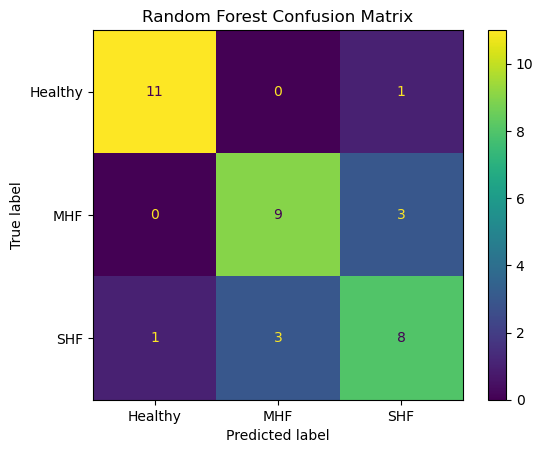

'\nconfusion_matrix = metrics.confusion_matrix(y_train,y_trainPred)\ncm_display = metrics.ConfusionMatrixDisplay( \n    confusion_matrix=confusion_matrix,display_labels=class_names) \n\ncm_display.plot() \nplt.show() \n'

In [25]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=1000,random_state=3)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
#y_trainPred = rfc.predict(X_train)

y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score,recall_score, f1_score, precision_score
from sklearn import metrics
#print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



def PrintMetrics(pred,test,ModelType):
    print('Model:',ModelType)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test,pred)))
    print('Model recall score: {0:0.4f}'. format(recall_score(test,pred,average='macro')))
    print('Model f1 score: {0:0.4f}'. format(f1_score(test,pred,average='macro')))
    print('Model precision score: {0:0.4f}'. format(precision_score(test,pred,average='macro')))


PrintMetrics(y_test,y_pred,'Random Forest')



class_names = np.unique(y)
#class_names =['MHF', 'Healthy', 'SHF']

#Double Checking that my confusion matrix labels are correct
countSHF = y_test.value_counts().get('SHF',0)
print('Occurence of SHF is:',countSHF)
countMHF = y_test.value_counts().get('MHF',0)
print('Occurence of MHF is:',countMHF)
countHealthy = y_test.value_counts().get('Healthy',0)
print('Occurence of Healthy is:',countHealthy)

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay( 
    confusion_matrix=confusion_matrix,display_labels=class_names)
  
cm_display.plot() 
plt.title('Random Forest Confusion Matrix')
plt.savefig('Random Forest Confusion Matrix')
plt.show() 

'''
confusion_matrix = metrics.confusion_matrix(y_train,y_trainPred)
cm_display = metrics.ConfusionMatrixDisplay( 
    confusion_matrix=confusion_matrix,display_labels=class_names) 
  
cm_display.plot() 
plt.show() 
'''

In [26]:
# create the classifier with n_estimators = 1000
clf = RandomForestClassifier(n_estimators=1000, random_state=0)



# fit the model to the training set
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

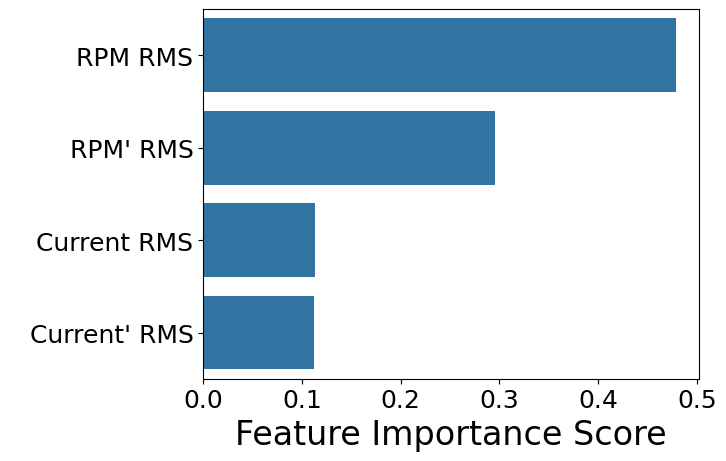

In [27]:
import seaborn as sns # statistical data visualization

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score',fontsize = 24)
plt.ylabel(' ')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.tick_params(axis='both', which='major', labelsize=18)
# Add title to the graph
#plt.title("Visualizing Important Features")
plt.savefig('Feature Importance Score',bbox_inches='tight')


# Visualize the graph


In [13]:
#K nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knnTrainScore = []
knnTestScore = []
N = []
for i in range(1,len(X_train)):
    N_neighbors = i
    knn = KNeighborsClassifier(N_neighbors)
    knn.fit(X_train,y_train)

    N.append(i)
    knnTrainScore.append(knn.score(X_train,y_train))
    knnTestScore.append(knn.score(X_test,y_test))

bestN =N[knnTestScore.index(max(knnTestScore))]

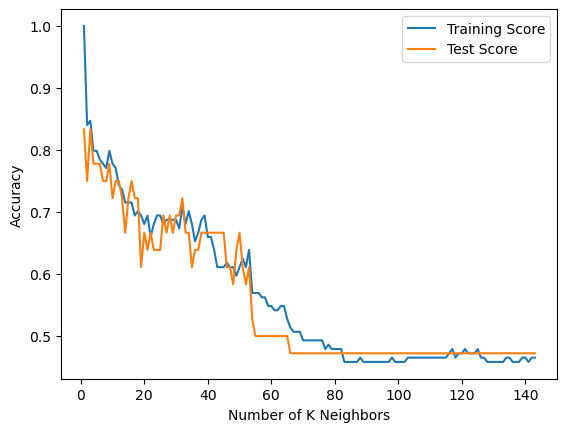

In [14]:
#KNN Plot

plt.plot(N, knnTrainScore, label='Training Score')
plt.plot(N, knnTestScore, label='Test Score')
plt.legend()
plt.xlabel('Number of K Neighbors')
plt.ylabel('Accuracy')
plt.show()

The best KNN Test score is: 0.8333333333333334
Model: KNN
Model accuracy score: 0.8333
Model recall score: 0.8588
Model f1 score: 0.8347
Model precision score: 0.8333


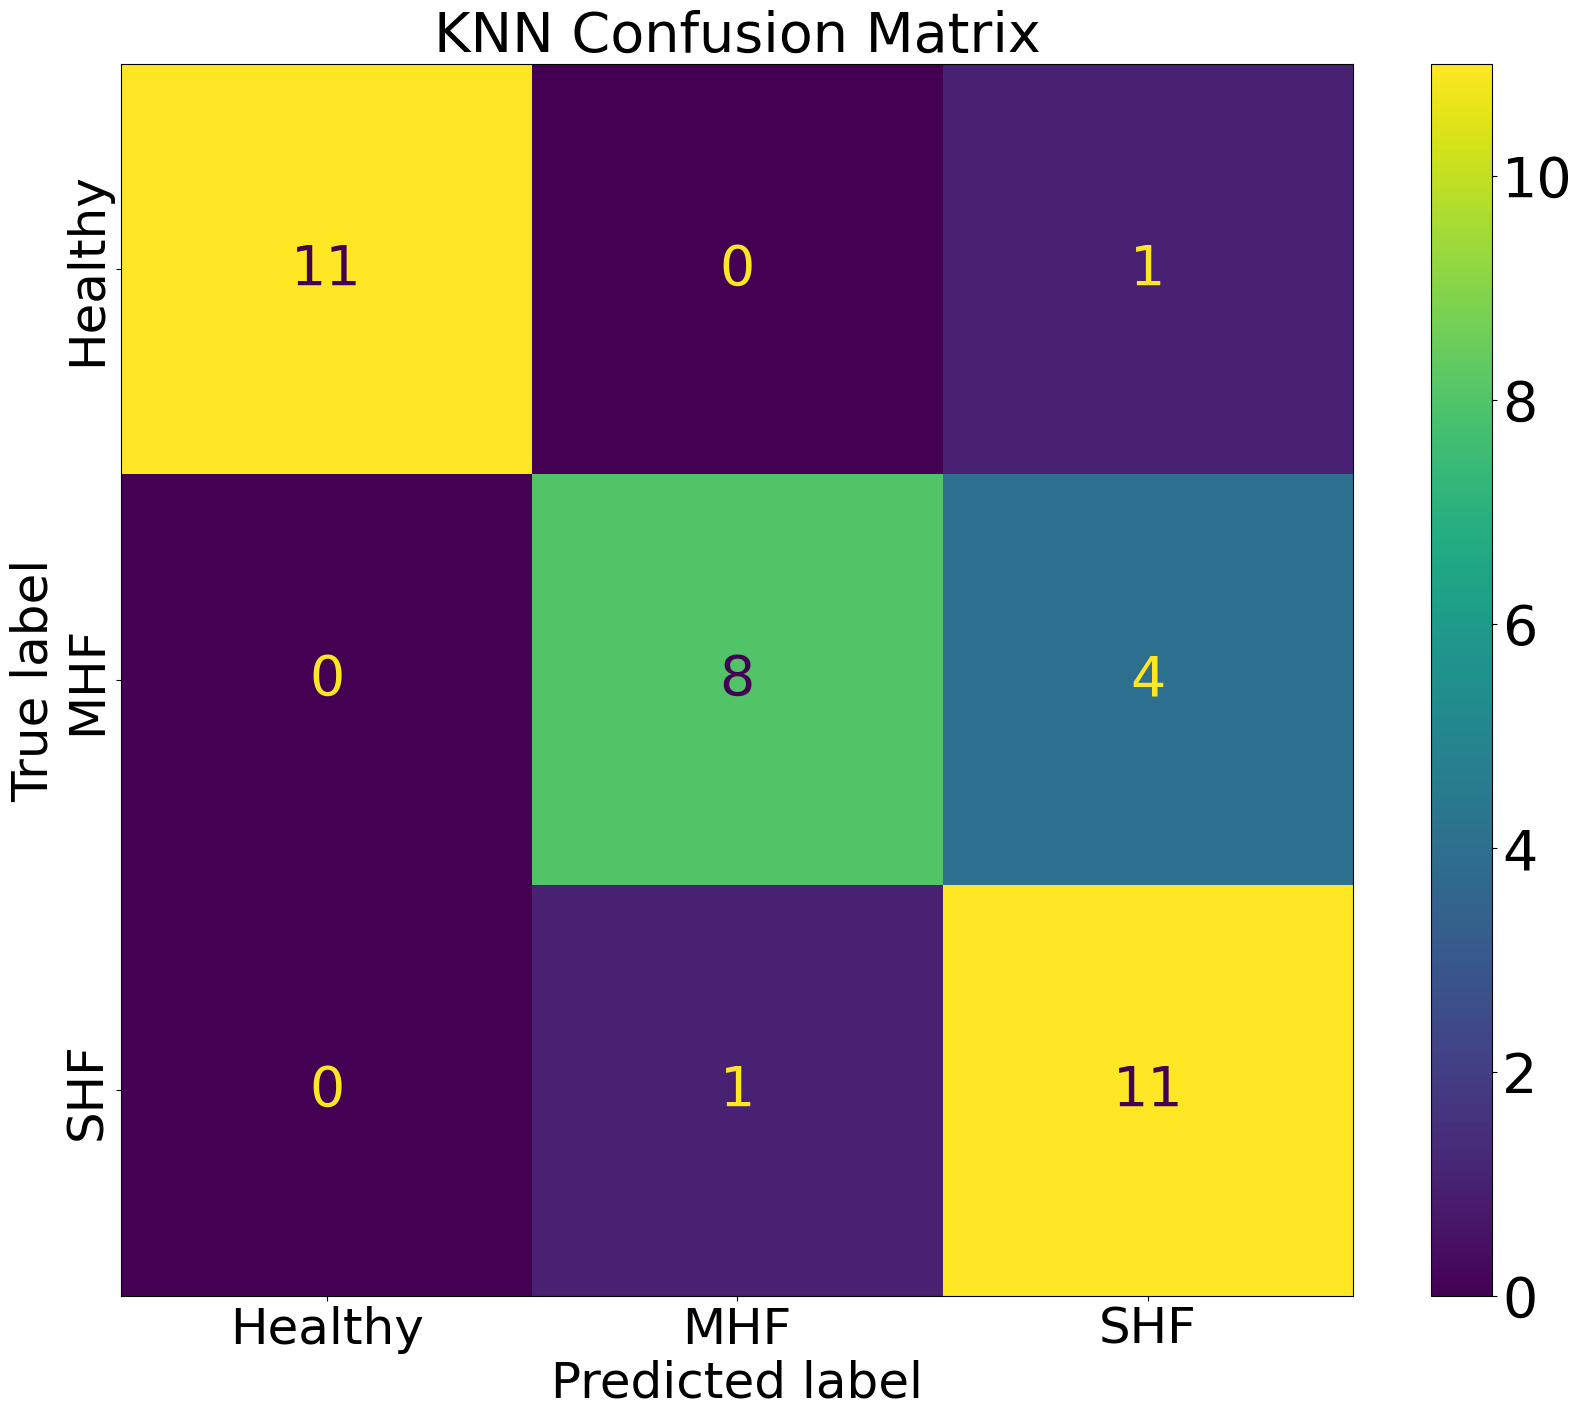

In [25]:
#KNN with Best N
knn = KNeighborsClassifier(bestN)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('The best KNN Test score is:',knn.score(X_test,y_test))

PrintMetrics(y_test,y_pred,'KNN')

#Plot Confusion Matrix

y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay( 
confusion_matrix=confusion_matrix,display_labels=class_names) 

CMsize = [20,16]
TitleSize=40
TickLabelSize=36
XYLabelSize=36

fig, ax = plt.subplots(1, 1, figsize=(CMsize))
plt.rcParams["font.size"]=40

cm_display.plot(ax=ax) 
plt.title('KNN Confusion Matrix',fontsize=TitleSize)

#axes[0].set_xlabel('')
#axes[0].set_ylabel('')
ax.yaxis.set_ticklabels(class_names,va = 'center')
ax.tick_params(axis='x', which='major', labelsize=TickLabelSize)
ax.tick_params(axis='y', which='major', labelsize=TickLabelSize,labelrotation = 90,)


plt.savefig('KNN Confusion Matrix')


In [16]:
#Support Vector Machines
from sklearn.svm import SVC

svm = SVC(kernel='linear',C = 0.5, random_state= 101)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

PrintMetrics(y_test,y_pred,'SVM')


Model: SVM
Model accuracy score: 0.7222
Model recall score: 0.7160
Model f1 score: 0.7089
Model precision score: 0.7222


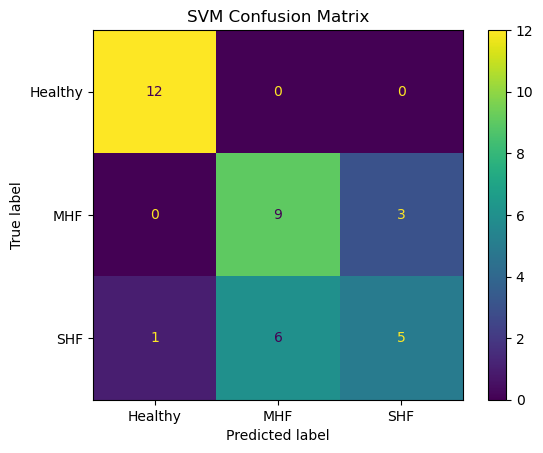

In [17]:
#Confusion Matrix

y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay( 
confusion_matrix=confusion_matrix,display_labels=class_names) 
  
cm_display.plot() 
plt.title('SVM Confusion Matrix')
plt.savefig('SVM Confusion Matrix')

plt.show() 

In [18]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50), random_state=1)
clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.6666666666666666
0.5277777777777778


/opt/anaconda3/envs/IEEEBHN/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


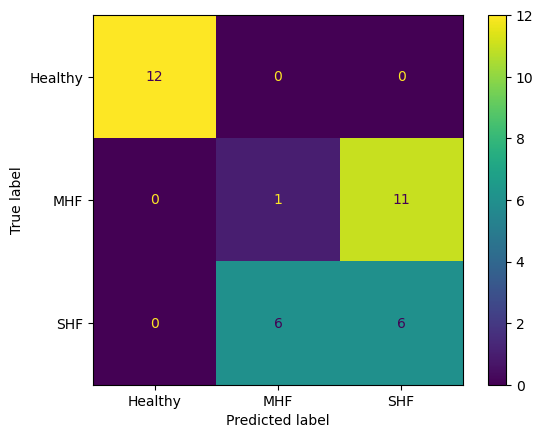

In [19]:
#Confusion Matrix

y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay( 
confusion_matrix=confusion_matrix,display_labels=class_names) 
  
cm_display.plot() 
plt.show() 

Combined Confusion Matrices


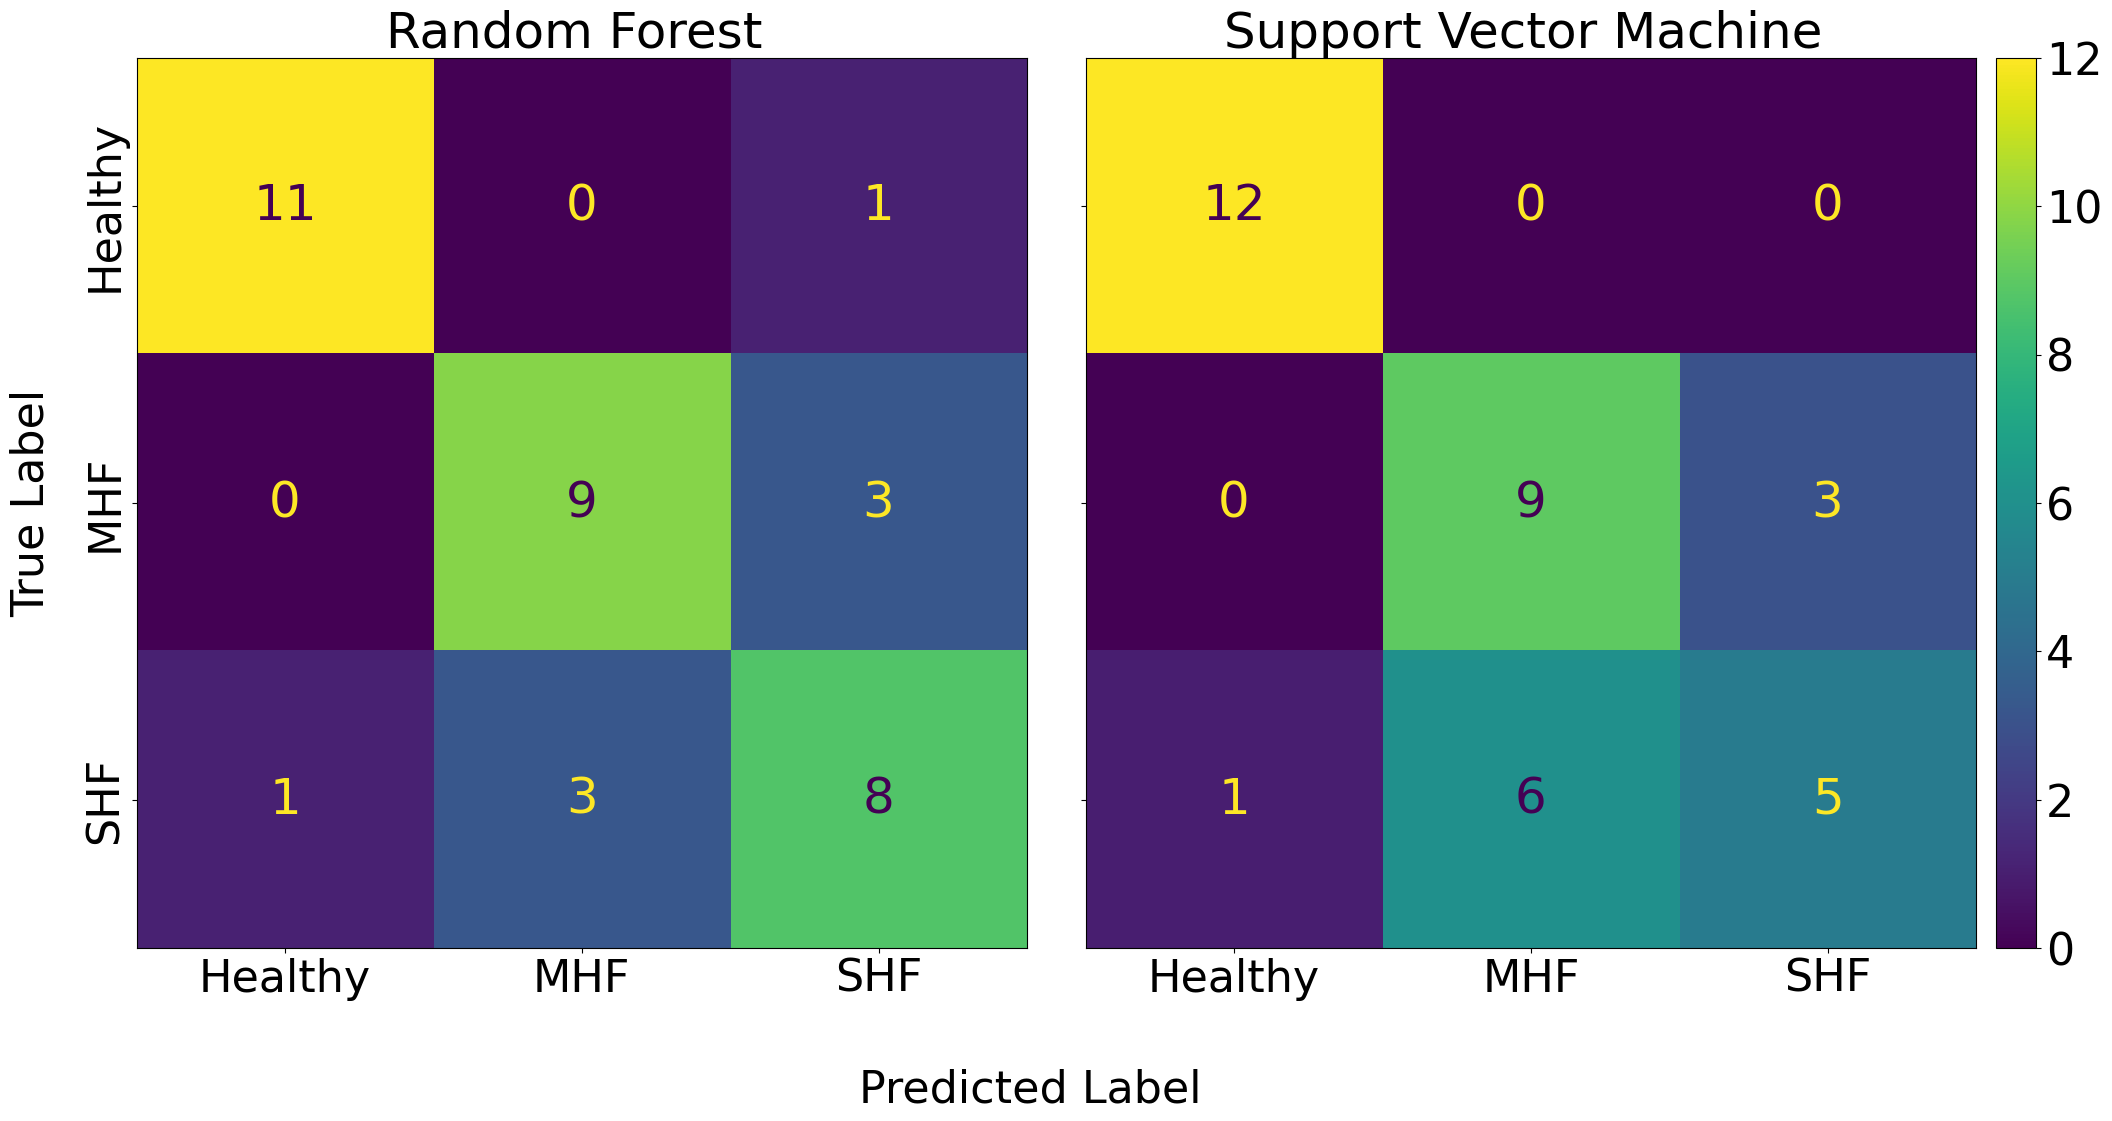

In [20]:
#KNN with Best N
knn = KNeighborsClassifier(bestN)
knn.fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)
#PrintMetrics(y_test,y_pred,'KNN')

#Plot Confusion Matrix

knn_y_pred = knn.predict(X_test)
knn_confusion_matrix = metrics.confusion_matrix(y_test,knn_y_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay( 
confusion_matrix=knn_confusion_matrix,display_labels=class_names) 
  
#ax1 = knn_cm_display.plot() 
#plt.title('KNN Confusion Matrix')
#plt.savefig('KNN Confusion Matrix')
#plt.show() 

# Random Forest

rf_y_pred = rfc.predict(X_test)

rf_confusion_matrix = metrics.confusion_matrix(y_test,rf_y_pred)
rf_cm_display = metrics.ConfusionMatrixDisplay( 
    confusion_matrix=rf_confusion_matrix,display_labels=class_names)
  
#rf_cm_display.plot() 
#plt.title('Random Forest Confusion Matrix')
#plt.savefig('Random Forest Confusion Matrix')
#plt.show() 


#Support Vector Machine
SVM_y_pred = svm.predict(X_test)
SVM_confusion_matrix = metrics.confusion_matrix(y_test,SVM_y_pred)
SVM_cm_display = metrics.ConfusionMatrixDisplay( 
confusion_matrix=SVM_confusion_matrix,display_labels=class_names) 
  
#SVM_cm_display.plot() 
#plt.title('SVM Confusion Matrix')
#plt.savefig('SVM Confusion Matrix')
#plt.show() 


#Plot all three
CMsize = [20,32]


f, axes = plt.subplots(1, 2, figsize=(CMsize))

plt.rcParams["font.size"]=36
'''
axes[0].set_title("KNN ", size=22)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix,display_labels=class_names).plot(ax=axes[0],colorbar=False) 
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', which='major', labelsize=20)
axes[0].tick_params(axis='y', which='major', labelsize=20,labelrotation = 90)
'''

axes[0].set_title("Random Forest ", size=36)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix,display_labels=class_names).plot(ax=axes[0],colorbar=False) 
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].yaxis.set_ticklabels(class_names,va = 'center')
axes[0].tick_params(axis='x', which='major', labelsize=32)
axes[0].tick_params(axis='y', which='major', labelsize=32,labelrotation = 90,)


axes[1].set_title("Support Vector Machine ", size=36)
SVM_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=SVM_confusion_matrix,display_labels=class_names).plot(ax=axes[1],colorbar=False) 
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].yaxis.set_ticklabels(['', '', ''])
axes[1].tick_params(axis='both', which='major', labelsize=32)
plt.tight_layout()


#f.suptitle("Multiple Confusion Matrices", size=24, y=0.62)
f.supxlabel('Predicted Label', size = 32, y=0.31)
f.supylabel('True Label', size = 32, y=0.5,x=-.01 )

cax = f.add_axes([axes[1].get_position().x1+0.01,axes[1].get_position().y0,0.02,axes[1].get_position().height])
cbar = plt.colorbar(SVM_cm_display.im_, cax=cax)
cbar.ax.tick_params (labelsize = 32)

plt.savefig('Combined Confusion Matrix RF SVM.png',bbox_inches='tight')

In [ ]:
'''import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, classification_report
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Split into train+val and test
X_trainvalPT, X_testPT, y_trainvalPT, y_testPT = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_trainPT, X_valPT, y_trainPT, y_valPT = train_test_split(X_trainvalPT, y_trainvalPT, test_size=0.1, stratify=y_trainvalPT, random_state=21)


#normalize input

scaler = MinMaxScaler()
X_trainPT = scaler.fit_transform(X_trainPT)
X_valPT = scaler.transform(X_valPT)
X_testPT = scaler.transform(X_testPT)
X_trainPT, y_trainPT = np.array(X_trainPT), np.array(y_trainPT)
X_valPT, y_valPT = np.array(X_valPT), np.array(y_valPT)
X_testPT, y_testPT = np.array(X_testPT), np.array(y_testPT)'''

In [ ]:
'''class ClassifierDataset(Dataset):
    
    def __init__(self, X_dataPT, y_dataPT):
        self.X_dataPT = X_dataPT
        self.y_dataPT = y_dataPT
        
    def __getitem__(self, index):
        return self.X_dataPT[index], self.y_dataPT[index]
        
    def __len__ (self):
        return len(self.X_dataPT)


train_datasetPT = ClassifierDataset(torch.from_numpy(X_trainPT).float(), torch.from_numpy(y_trainPT).long())
val_datasetPT = ClassifierDataset(torch.from_numpy(X_valPT).float(), torch.from_numpy(y_valPT).long())
test_datasetPT = ClassifierDataset(torch.from_numpy(X_testPT).float(), torch.from_numpy(y_testPT).long())'''

In [ ]:
'''target_list = []
for _, t in train_datasetPT:
    target_list.append(t)
    
target_list = torch.tensor(target_list)'''